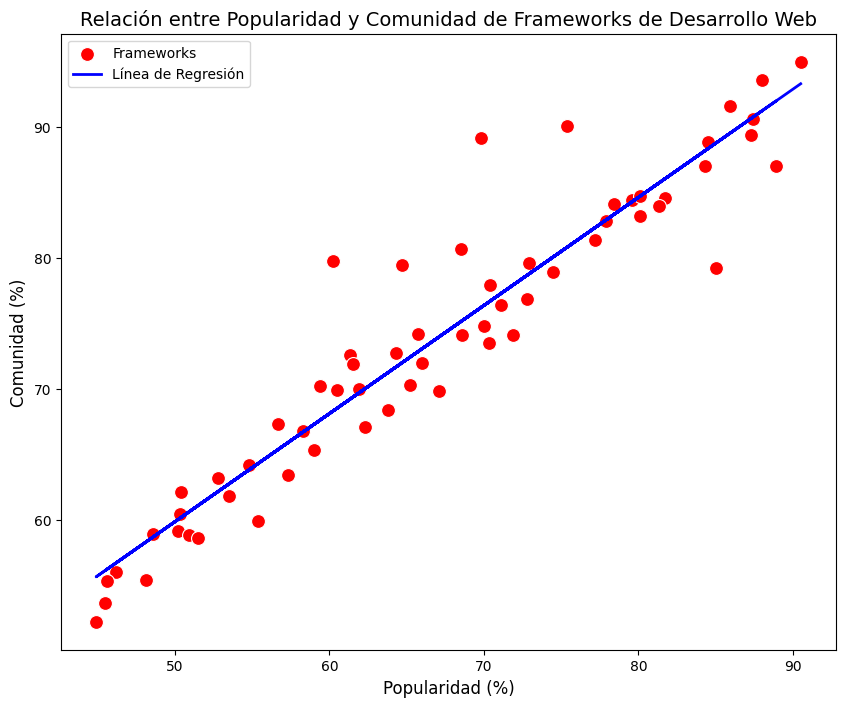

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Cargar el archivo CSV
file_path = 'TendenciasUsoFrameworkDesarrolloWebProyectos.csv'
data_frameworks = pd.read_csv(file_path, encoding='ISO-8859-1')

# Limpiar las columnas de porcentaje convirtiéndolas a números
data_frameworks['Popularidad (%)'] = data_frameworks['Popularidad (%)'].replace(r'%', '', regex=True).astype(float)
data_frameworks['Comunidad (%)'] = data_frameworks['Comunidad (%)'].replace(r'%', '', regex=True).astype(float)
data_frameworks['Facilidad de Aprendizaje (%)'] = data_frameworks['Facilidad de Aprendizaje (%)'].replace(r'%', '', regex=True).astype(float)

# Eliminar filas con valores NaN en las columnas relevantes
data_clean_frameworks = data_frameworks.dropna(subset=['Popularidad (%)', 'Comunidad (%)', 'Facilidad de Aprendizaje (%)'])

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 8))

# Gráfico de dispersión para Popularidad vs Comunidad sin figuras
sns.scatterplot(data=data_clean_frameworks,
                x='Popularidad (%)',
                y='Comunidad (%)',
                color='red',  # Puntos en color rojo
                s=100,
                label='Frameworks')  # Etiqueta para la leyenda

# Ajustar la regresión lineal para la línea de tendencia
X = data_clean_frameworks[['Popularidad (%)']]
y = data_clean_frameworks['Comunidad (%)']
model = LinearRegression()
model.fit(X, y)

# Predecir los valores de y (comunidad) con base en X (popularidad)
y_pred = model.predict(X)

# Añadir la línea de regresión al gráfico (color azul)
plt.plot(data_clean_frameworks['Popularidad (%)'], y_pred, color='blue', linewidth=2, label='Línea de Regresión')

# Agregar etiquetas y título
plt.title('Relación entre Popularidad y Comunidad de Frameworks de Desarrollo Web', fontsize=14)
plt.xlabel('Popularidad (%)', fontsize=12)
plt.ylabel('Comunidad (%)', fontsize=12)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
